In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from pandas import read_csv
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [20]:
filename='./pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df=read_csv(filename,names=names)
array=df.values

x=array[:,0:8]
y=array[:,8]

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, random_state=7) 

model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)

#classification report

report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       162
         1.0       0.74      0.63      0.68        92

    accuracy                           0.79       254
   macro avg       0.78      0.75      0.76       254
weighted avg       0.78      0.79      0.78       254



In [22]:
df1=df.copy()

In [23]:
df1.isnull()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=7)

In [25]:
dtc=DecisionTreeClassifier().fit(x_train,y_train)

In [26]:
y_predict=dtc.predict(x_test)

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
FPR,TPR,T=roc_curve(y_test,y_predict)
print(FPR,TPR,T)

[0.        0.2037037 1.       ] [0.         0.54347826 1.        ] [inf  1.  0.]


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
AUC_score=roc_auc_score(y_test,y_predict)
print(AUC_score)

0.6698872785829307


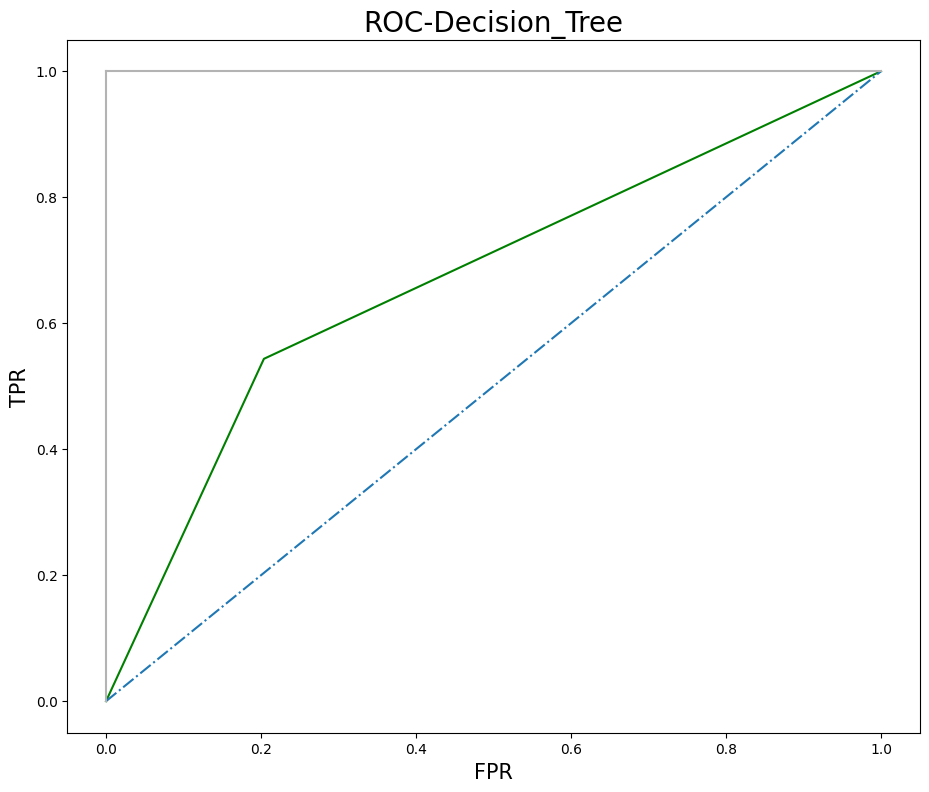

In [30]:
plt.figure(figsize=(11,9))
plt.plot(FPR,TPR,color='g')
plt.plot([0, 1], ls="-.")
plt.plot([0, 0], [1, 0] , c="0.7"), plt.plot([1, 1] , c="0.7")
plt.title("ROC-Decision_Tree",size=20)
plt.xlabel("FPR",size=15)
plt.ylabel("TPR",size=15)
plt.show()

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

model=LogisticRegression()
model.fit(x_train,y_train)

from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=10,shuffle=True)

scoring = 'neg_log_loss'
results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
print("Logloss:",results.mean(), results.std())
recall = cross_val_score(model, x_train, y_train, cv=5, scoring='recall')
precision = cross_val_score(model, x_train, y_train, cv=5, scoring='precision')
accuracy = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
f1_score = cross_val_score(model, x_train, y_train, cv=5, scoring='f1_macro')


Logloss: -0.49424340383174564 0.0827697912623723


In [32]:
from sklearn.metrics import classification_report, confusion_matrix
#threshold = 0.1
#y_pred = y_pred >= threshold
print(classification_report(y_test, y_predict))
pd.DataFrame(confusion_matrix(y_test, y_predict),
             columns=['Predicted Negative', 'Predicted Positive'],
             index=['Actual Negative', 'Actual Positive'])

              precision    recall  f1-score   support

         0.0       0.75      0.80      0.77       162
         1.0       0.60      0.54      0.57        92

    accuracy                           0.70       254
   macro avg       0.68      0.67      0.67       254
weighted avg       0.70      0.70      0.70       254



,Predicted Negative,Predicted Positive
Actual Negative,129,33
Actual Positive,42,50


- Comparing ML Models

In [33]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [34]:

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [35]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7,shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(name, cv_results.mean(), cv_results.std())

LR 0.785708898944193 0.06807558469576383
LDA 0.7721342383107089 0.08283036690391968
KNN 0.7138009049773756 0.05763880246449064
CART 0.6730769230769231 0.06254450219569783
NB 0.7663650075414781 0.07874115784766206
SVM 0.7605203619909503 0.053229548224702564


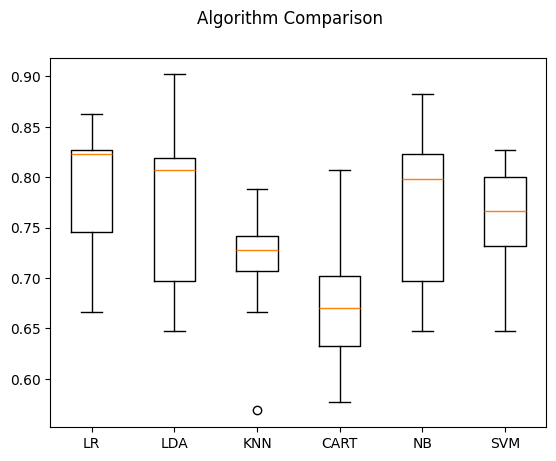

In [36]:
# boxplot algorithm comparison
from matplotlib import pyplot

fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()
